In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/myanimelist/manga.csv
/kaggle/input/myanimelist/anime.csv


In [2]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from plotly.subplots import make_subplots

In [3]:
pd.options.display.max_columns = None

In [4]:
df = pd.read_csv('/kaggle/input/myanimelist/manga.csv')
df.head()

manga_id                                            title   type  score  \
0         2                                          Berserk  manga   9.47   
1        13                                        One Piece  manga   9.22   
2      1706  JoJo no Kimyou na Bouken Part 7: Steel Ball Run  manga   9.30   
3      4632                                   Oyasumi Punpun  manga   9.02   
4        25                              Fullmetal Alchemist  manga   9.03   

   scored_by                status  volumes  chapters  start_date    end_date  \
0     319696  currently_publishing      NaN       NaN  1989-08-25         NaN   
1     355375  currently_publishing      NaN       NaN  1997-07-22         NaN   
2     151433              finished     24.0      96.0  2004-01-19  2011-04-19   
3     168459              finished     13.0     147.0  2007-03-15  2013-11-02   
4     153151              finished     27.0     116.0  2001-07-12  2010-09-11   

   members  favorites   sfw  approved          created_at_before  \
0   643969     119470  True      True  2007-07-17 20:14:45+00:00   
1   579557     111462  True      True  2007-07-17 20:14:45+00:00   
2   248511      41713  True      True  2007-10-07 08:14:20+00:00   
3   413897      49361  True      True  2008-02-03 15:54:30+00:00   
4   284027      29634  True      True  2007-07-17 20:14:45+00:00   

                  updated_at real_start_date real_end_date  \
0  2023-04-01 00:19:31+00:00      1989-08-25           NaN   
1  2023-06-24 12:39:48+00:00      1997-07-22           NaN   
2  2023-04-02 18:07:42+00:00      2004-01-19    2011-04-19   
3  2023-04-02 18:09:11+00:00      2007-03-15    2013-11-02   
4  2023-05-27 17:21:27+00:00      2001-07-12    2010-09-11   

                                              genres  \
0  ['Action', 'Adventure', 'Award Winning', 'Dram...   
1                 ['Action', 'Adventure', 'Fantasy']   
2  ['Action', 'Adventure', 'Mystery', 'Supernatur...   
3                         ['Drama', 'Slice of Life']   
4  ['Action', 'Adventure', 'Award Winning', 'Dram...   

                                              themes           demographics  \
0  ['Gore', 'Military', 'Mythology', 'Psychologic...             ['Seinen']   
1                                                 []            ['Shounen']   
2                                     ['Historical']  ['Seinen', 'Shounen']   
3                                  ['Psychological']             ['Seinen']   
4                                       ['Military']            ['Shounen']   

                                             authors  \
0  [{'id': 1868, 'first_name': 'Kentarou', 'last_...   
1  [{'id': 1881, 'first_name': 'Eiichiro', 'last_...   
2  [{'id': 2619, 'first_name': 'Hirohiko', 'last_...   
3  [{'id': 2836, 'first_name': 'Inio', 'last_name...   
4  [{'id': 1874, 'first_name': 'Hiromu', 'last_na...   

              serializations  \
0           ['Young Animal']   
1  ['Shounen Jump (Weekly)']   
2             ['Ultra Jump']   
3      ['Big Comic Spirits']   
4         ['Shounen Gangan']   

                                            synopsis  \
0  Guts, a former mercenary now known as the "Bla...   
1  Gol D. Roger, a man referred to as the "King o...   
2  In the American Old West, the world's greatest...   
3  Punpun Onodera is a normal 11-year-old boy liv...   
4  Alchemists are knowledgeable and naturally tal...   

                                          background  \
0  Berserk won the Award for Excellence at the si...   
1  One Piece is the highest selling manga series ...   
2  JoJo no Kimyou na Bouken Part 7: Steel Ball Ru...   
3  Oyasumi Punpun was originally serialized in Yo...   
4  Hagane no Renkinjutsushi won the 49th Shogakuk...   

                                        main_picture  \
0  https://cdn.myanimelist.net/images/manga/1/157...   
1  https://cdn.myanimelist.net/images/manga/2/253...   
2  https://cdn.myanimelist.net/images/manga/3/179...   
3  https://cdn.myanimelis

Before we start, let us understand what each attribute talks about:

manga_id - MyAnimeList Manga ID  
title - Title (rōmaji or english)  
type - Manga media type  
score - MAL Weighted Score  
scored_by - Number of users who scored this manga  
status - Publishing status  
volumes - Number of Volumes  
chapters - Number of Chapters  
start_date - Publishing Start Date  
end_date - Publishing End Date  
members - Number of users with this manga in their list  
favorites - Number of users who favorited this manga  
sfw - Whether it's Safe For Work or it's R18+  
approved - Whether it's approved or is yet 'pending approval'  
created_at_before - MAL Manga entry created before this date  
updated_at - MAL Manga entry latest update date  
real_start_date - Some entries only have year or year-month  
real_end_date - Some entries only have year or year-month  
genres - List of Genres  
themes - List of Themes  
demographics - List of Demographics  
authors - List of Authors (id, first and last name, role)  
serializations - List of Magazines where it's been published  
synopsis - Manga description  
background - Manga additional information  
main_picture - MAL main picture url  
url - MyAnimeList url  
title_english - Title in English  
title_japanese - Title in Japanese  
title_synonyms - List of title synonyms  

There are a lot of attributes in this dataset which won't be useful for us, so we shall drop those attributes from the dataset.

In [5]:
df.drop(['manga_id', 'approved', 'synopsis', 'background', 'genres', 'themes', 'demographics', 'authors', 'serializations', 
         'main_picture', 'url', 'created_at_before', 'updated_at','title_english', 'title_japanese', 'title_synonyms'], axis=1, inplace=True)
df

title      type  score  \
0                                              Berserk     manga   9.47   
1                                            One Piece     manga   9.22   
2      JoJo no Kimyou na Bouken Part 7: Steel Ball Run     manga   9.30   
3                                       Oyasumi Punpun     manga   9.02   
4                                  Fullmetal Alchemist     manga   9.03   
...                                                ...       ...    ...   
64828                            Raise wa Kimi no Mono     manga    NaN   
64829                         Ore to Basil no Automata     manga    NaN   
64830                                Happy Candy Virus     manga    NaN   
64831                         Suibu Yametai Hagino-san  one_shot    NaN   
64832                  Kidou Senshi Gundam F91 Prequel     manga    NaN   

       scored_by                status  volumes  chapters  start_date  \
0         319696  currently_publishing      NaN       NaN  1989-08-25   
1         355375  currently_publishing      NaN       NaN  1997-07-22   
2         151433              finished     24.0      96.0  2004-01-19   
3         168459              finished     13.0     147.0  2007-03-15   
4         153151              finished     27.0     116.0  2001-07-12   
...          ...                   ...      ...       ...         ...   
64828          1              finished      1.0       8.0  2018-08-30   
64829          0              finished      2.0      19.0  2013-01-19   
64830          0              finished      4.0      54.0  2021-08-02   
64831          0              finished      NaN       1.0  2022-03-03   
64832          0  currently_publishing      NaN       NaN  2020-01-24   

         end_date  members  favorites   sfw real_start_date real_end_date  
0             NaN   643969     119470  True      1989-08-25           NaN  
1             NaN   579557     111462  True      1997-07-22           NaN  
2      2011-04-19   248511      41713  True      2004-01-19    2011-04-19  
3      2013-11-02   413897      49361  True      2007-03-15    2013-11-02  
4      2010-09-11   284027      29634  True      2001-07-12    2010-09-11  
...           ...      ...        ...   ...             ...           ...  
64828  2019-04-10        4          0  True      2018-08-30    2019-04-10  
64829  2014-04-19        4          0  True      2013-01-19    2014-04-19  
64830  2023-03-13        4          0  True      2021-08-02    2023-03-13  
64831  2022-03-03        4          0  True      2022-03-03    2022-03-03  
64832         NaN        3          0  True      2020-01-24           NaN  

[64833 rows x 14 columns]

In [6]:
df.shape

(64833, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64833 entries, 0 to 64832
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            64833 non-null  object 
 1   type             64833 non-null  object 
 2   score            24636 non-null  float64
 3   scored_by        64833 non-null  int64  
 4   status           64833 non-null  object 
 5   volumes          48211 non-null  float64
 6   chapters         46042 non-null  float64
 7   start_date       62950 non-null  object 
 8   end_date         51932 non-null  object 
 9   members          64833 non-null  int64  
 10  favorites        64833 non-null  int64  
 11  sfw              64833 non-null  bool   
 12  real_start_date  62950 non-null  object 
 13  real_end_date    51932 non-null  object 
dtypes: bool(1), float64(3), int64(3), object(7)
memory usage: 6.5+ MB


In [8]:
df.describe()

score      scored_by       volumes      chapters        members  \
count  24636.000000   64833.000000  48211.000000  46042.000000   64833.000000   
mean       6.945179     686.997501      2.970090     21.186417    1758.756127   
std        0.520170    5514.493705      4.771116     53.896370   11083.107361   
min        2.440000       0.000000      1.000000      1.000000       3.000000   
25%        6.620000       7.000000      1.000000      5.000000      64.000000   
50%        6.910000      46.000000      1.000000      9.000000     190.000000   
75%        7.250000     261.000000      3.000000     19.000000     786.000000   
max        9.470000  394362.000000    200.000000   6477.000000  643969.000000   

           favorites  
count   64833.000000  
mean       54.991440  
std      1057.059487  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         3.000000  
max    119470.000000

### There are certainly null values. Let us find out how many attributes are missing values and how much.

In [9]:
df.isnull().sum()

title                  0
type                   0
score              40197
scored_by              0
status                 0
volumes            16622
chapters           18791
start_date          1883
end_date           12901
members                0
favorites              0
sfw                    0
real_start_date     1883
real_end_date      12901
dtype: int64

In [10]:
indexScore = df[df['score'].isnull()].index
indexScore

Index([24636, 24637, 24638, 24639, 24640, 24641, 24642, 24643, 24644, 24645,
       ...
       64823, 64824, 64825, 64826, 64827, 64828, 64829, 64830, 64831, 64832],
      dtype='int64', length=40197)

In [11]:
df.drop(indexScore, inplace=True)
df

title       type  score  \
0                                                Berserk      manga   9.47   
1                                              One Piece      manga   9.22   
2        JoJo no Kimyou na Bouken Part 7: Steel Ball Run      manga   9.30   
3                                         Oyasumi Punpun      manga   9.02   
4                                    Fullmetal Alchemist      manga   9.03   
...                                                  ...        ...    ...   
24631  Fukushuu Josou Rape!! Namaiki na Kawaii Furyou...  doujinshi   5.96   
24632                                            Houkago   one_shot   5.82   
24633                                 Home Stay x Steady   one_shot   5.84   
24634                                         Oni Shimin   one_shot   5.71   
24635                         Nichijou Sahanji no Musuko   one_shot   5.64   

       scored_by                status  volumes  chapters  start_date  \
0         319696  currently_publishing      NaN       NaN  1989-08-25   
1         355375  currently_publishing      NaN       NaN  1997-07-22   
2         151433              finished     24.0      96.0  2004-01-19   
3         168459              finished     13.0     147.0  2007-03-15   
4         153151              finished     27.0     116.0  2001-07-12   
...          ...                   ...      ...       ...         ...   
24631        102              finished      1.0       NaN  2013-01-19   
24632        103              finished      NaN       1.0  2010-01-01   
24633        100              finished      NaN       1.0         NaN   
24634        101              finished      NaN       1.0  2015-05-15   
24635        101              finished      NaN       1.0  1982-05-24   

         end_date  members  favorites    sfw real_start_date real_end_date  
0             NaN   643969     119470   True      1989-08-25           NaN  
1             NaN   579557     111462   True      1997-07-22           NaN  
2      2011-04-19   248511      41713   True      2004-01-19    2011-04-19  
3      2013-11-02   413897      49361   True      2007-03-15    2013-11-02  
4      2010-09-11   284027      29634   True      2001-07-12    2010-09-11  
...           ...      ...        ...    ...             ...           ...  
24631  2013-01-19      311          1  False      2013-01-19    2013-01-19  
24632  2010-01-01      194          0   True            2010          2010  
24633         NaN      191          0   True             NaN           NaN  
24634  2015-05-15      166          0   True      2015-05-15    2015-05-15  
24635  1982-05-24      185          0   True      1982-05-24    1982-05-24  

[24636 rows x 14 columns]

In [12]:
df.isnull().sum()

title                 0
type                  0
score                 0
scored_by             0
status                0
volumes            6314
chapters           4697
start_date          871
end_date           5037
members               0
favorites             0
sfw                   0
real_start_date     871
real_end_date      5037
dtype: int64

In [13]:
df.shape

(24636, 14)

In [14]:
for col in ['start_date', 'end_date', 'real_start_date', 'real_end_date']:
    df[col] = pd.to_datetime(df[col], format='mixed')
    
# for col in ['volumes', 'chapters']:
#     df[col] = df[col].astype('Int64')

In [15]:
df.head()

title   type  score  scored_by  \
0                                          Berserk  manga   9.47     319696   
1                                        One Piece  manga   9.22     355375   
2  JoJo no Kimyou na Bouken Part 7: Steel Ball Run  manga   9.30     151433   
3                                   Oyasumi Punpun  manga   9.02     168459   
4                              Fullmetal Alchemist  manga   9.03     153151   

                 status  volumes  chapters start_date   end_date  members  \
0  currently_publishing      NaN       NaN 1989-08-25        NaT   643969   
1  currently_publishing      NaN       NaN 1997-07-22        NaT   579557   
2              finished     24.0      96.0 2004-01-19 2011-04-19   248511   
3              finished     13.0     147.0 2007-03-15 2013-11-02   413897   
4              finished     27.0     116.0 2001-07-12 2010-09-11   284027   

   favorites   sfw real_start_date real_end_date  
0     119470  True      1989-08-25           NaT  
1     111462  True      1997-07-22           NaT  
2      41713  True      2004-01-19    2011-04-19  
3      49361  True      2007-03-15    2013-11-02  
4      29634  True      2001-07-12    2010-09-11

In [16]:
df['start_date'] = df['start_date'].dt.year.astype('Int64')
df['end_date'] = df['end_date'].dt.year.astype('Int64')

In [17]:
df.head()

title   type  score  scored_by  \
0                                          Berserk  manga   9.47     319696   
1                                        One Piece  manga   9.22     355375   
2  JoJo no Kimyou na Bouken Part 7: Steel Ball Run  manga   9.30     151433   
3                                   Oyasumi Punpun  manga   9.02     168459   
4                              Fullmetal Alchemist  manga   9.03     153151   

                 status  volumes  chapters  start_date  end_date  members  \
0  currently_publishing      NaN       NaN        1989      <NA>   643969   
1  currently_publishing      NaN       NaN        1997      <NA>   579557   
2              finished     24.0      96.0        2004      2011   248511   
3              finished     13.0     147.0        2007      2013   413897   
4              finished     27.0     116.0        2001      2010   284027   

   favorites   sfw real_start_date real_end_date  
0     119470  True      1989-08-25           NaT  
1     111462  True      1997-07-22           NaT  
2      41713  True      2004-01-19    2011-04-19  
3      49361  True      2007-03-15    2013-11-02  
4      29634  True      2001-07-12    2010-09-11

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24636 entries, 0 to 24635
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   title            24636 non-null  object        
 1   type             24636 non-null  object        
 2   score            24636 non-null  float64       
 3   scored_by        24636 non-null  int64         
 4   status           24636 non-null  object        
 5   volumes          18322 non-null  float64       
 6   chapters         19939 non-null  float64       
 7   start_date       23765 non-null  Int64         
 8   end_date         19599 non-null  Int64         
 9   members          24636 non-null  int64         
 10  favorites        24636 non-null  int64         
 11  sfw              24636 non-null  bool          
 12  real_start_date  23765 non-null  datetime64[ns]
 13  real_end_date    19599 non-null  datetime64[ns]
dtypes: Int64(2), bool(1), datetime64[ns](2

In [19]:
df.describe()

score      scored_by       volumes      chapters   start_date  \
count  24636.000000   24636.000000  18322.000000  19939.000000      23765.0   
mean       6.945179    1769.555691      3.921242     26.740358  2010.219903   
min        2.440000     100.000000      1.000000      1.000000       1946.0   
25%        6.620000     203.000000      1.000000      5.000000       2006.0   
50%        6.910000     418.000000      2.000000      9.000000       2011.0   
75%        7.250000    1060.000000      4.000000     26.000000       2016.0   
max        9.470000  394362.000000    200.000000   6477.000000       2023.0   
std        0.520170    8839.552408      6.005744     70.176909     8.462833   

          end_date        members      favorites  \
count      19599.0   24636.000000   24636.000000   
mean   2011.090719    4427.903190     143.932619   
min         1947.0     166.000000       0.000000   
25%         2007.0     610.000000       1.000000   
50%         2012.0    1191.000000       4.000000   
75%         2017.0    2896.000000      19.000000   
max         2023.0  643969.000000  119470.000000   
std       8.097007   17656.467096    1711.092022   

                     real_start_date                  real_end_date  
count                          23765                          19599  
mean   2010-08-30 10:55:51.718914304  2011-07-14 16:11:40.933721088  
min              1946-01-04 00:00:00            1947-04-01 00:00:00  
25%              2006-09-07 00:00:00            2007-11-28 12:00:00  
50%              2011-10-05 00:00:00            2012-09-25 00:00:00  
75%              2016-10-09 00:00:00            2017-02-07 12:00:00  
max              2023-07-17 00:00:00            2023-07-28 00:00:00  
std                              NaN                            NaN

In [20]:
columns = [['score', 'scored_by'],['volumes', 'chapters'],['members', 'favorites']]
fig = make_subplots(rows=3, cols=2)
for i in range(3):
    for j in range(2):
        fig.add_trace(go.Histogram(x=df[columns[i][j]], name=columns[i][j]),row=i+1, col=j+1)
fig.update_layout(height=1600, width=1600,title_text="Plotting Distributions of each Numeric Feature")

### From these plots, our interest in on the **'Score'** feature which seems to be following a normal distribution

In [21]:
px.histogram(df,x='score')

<Axes: xlabel='score', ylabel='Count'>

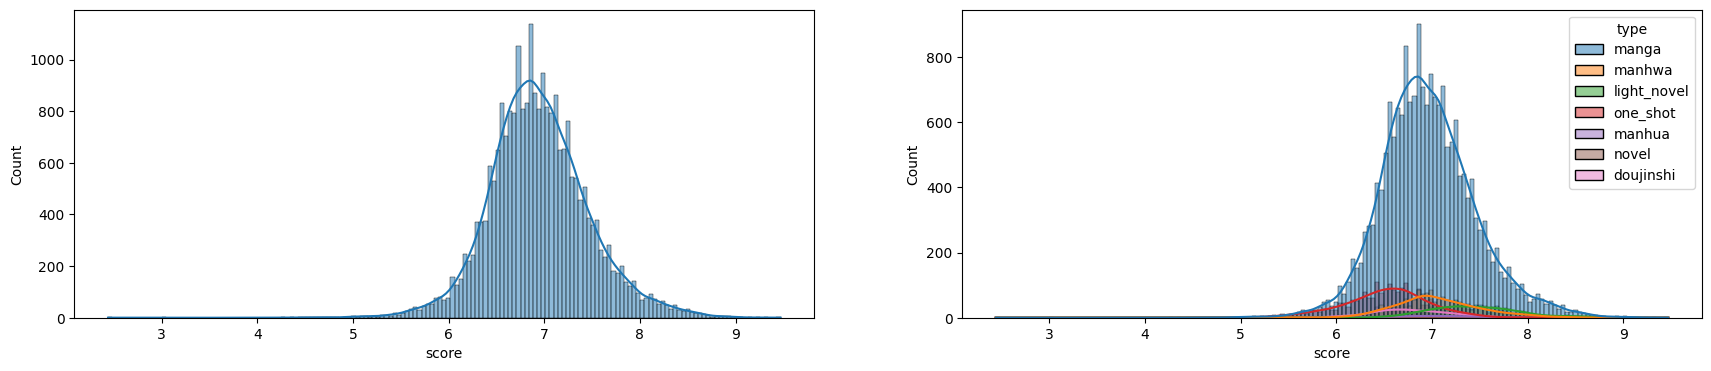

In [22]:
fig, ax = plt.subplots(figsize=(21,4), nrows=1, ncols=2)
sns.histplot(df, x='score',kde=True, ax=ax[0])
sns.histplot(df, x='score', hue='type', kde=True, ax=ax[1])

### Let us look at how this 'score' feature is correlated with other features.

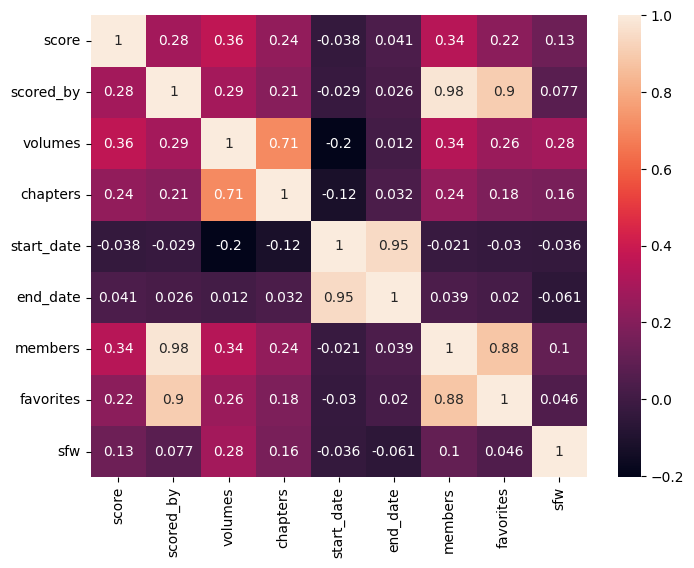

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

### This might be the most obvious inference that can be made. We could see from the correlation heatmap that the features 'volumes' and 'chapters' are positively correlated and to a good extent which makes sense because it is inherent that if the number of volumes are high, the book should have more chapters.

In [24]:
px.scatter(df, x="volumes", y="chapters", color="type", facet_col="sfw", hover_data=['title'], trendline='ols')

### There are a few more obvious inferences we can do about correlations between features that makes a lot of sense, like the number of 'members' who have added that book to their library and the number of people who have 'favourited' them; 'scored_by' and 'favourites' also makes a lot of sense to have high correlation and is obvious, as well as 'members' and 'scored_by'. So their plots are useless for us now. Let us look at more interesting correlations.

### The 'score' and 'chapters' have a good inference that can be drawn from the scatterplot. Mostly, people have given good ratings for Mangas ans Books that are having less than 1000 chapters, as we can see that a good number of entries that have good scores are accumulated near the score ranges of 7 to 9 and all those entries' chapter counts are well below 1000. Although, there are a few outliers who are scored considerably well and they have more than 1000 chapters, so the inference is that as the number of chapters increases, people definitely don't like the Manga but that is not all, there are a few more attributes that are also considered like how interesting the story is, for example. 

In [25]:
px.scatter(df, x="score", y="chapters", color="type", facet_col="sfw", hover_data=['title'])

### The 'scores' and 'volumes' also will have the same inference. People do not give good scores for Mangas and Books that exceed 50 chapters but still we have outliers which again means that the number of volumes is alone not the criteria. But based on most of the entries, we can infer that 50 and below is a good number of volumes for a Manga or a Book.

In [26]:
px.scatter(df, x="score", y="volumes", color="type", facet_col="sfw", hover_data=['title'])

### This scatterplot shows that the score is increasing as the scored_by is also increasing but this is not always an obvious behavior as we know that a product with really good average score that has only very few people who have scored them is not a good judge of the quality of the product. Here, we can see that there are many entries that have good overall score even after having so many people rating it as those mangas and books are actually nice and people have liked them. Still, this also has some outliers.

In [27]:
px.scatter(df, x="score", y="scored_by", color="type", facet_col="sfw", hover_data=['title'])

### The 'score' and 'members' features' correlation makes a good observation. As, the manga score is better, more people have added it to their database which means that they have either planned to read it or have already read it. This can mean the other way around too. People who have added it to their database could have also rated it, so the previous plot is a subset of this plot. We can clearly see that the member count increases as the score increases too.

In [28]:
px.scatter(df, x="score", y="members", color="type", facet_col="sfw", hover_data=['title'])

### This is also a subset of the previous plot, the number of favourites increase as the score is increasing. This is a very obvious relation, because when people like it, they will add it to their favourites list and also rate it if they are interested in doing so. So it perfectly makes sense that the mangas and books with the highest scores also are favorited by more people.  

In [29]:
px.scatter(df, x="score", y="favorites", color="type", facet_col="sfw", hover_data=['title'])

## Inferences from the Above Scatter Plots: (We are only concerned with Manga here)

### 1. Sazae-san is the SFW manga with the highest chapter count having 6477 chapters in total while Infection is the NSFW manga with the highest chapter count having 267 chapters in total.
### 2. Jojo's Bizzare Adventures is the highest rated SFW manga with a score of 9.30 and Sotsugyousei is the highest rated NSFW manga with a score of 8.51
### 3. Kochira... is the SFW manga with the highest volume count with 200 volumes in total and Infection is the NSFW manga with the highest volume count with 30 volumes in total.
### 4. Berserk (SFW) and Nozoki Ana (NSFW) are the mangas with the highest number of people having added them to their database. They are also the mangas with the highest favourites count.

### Now let us dive a little bit deep into how the feature 'score' is distributed.

<Axes: xlabel='score'>

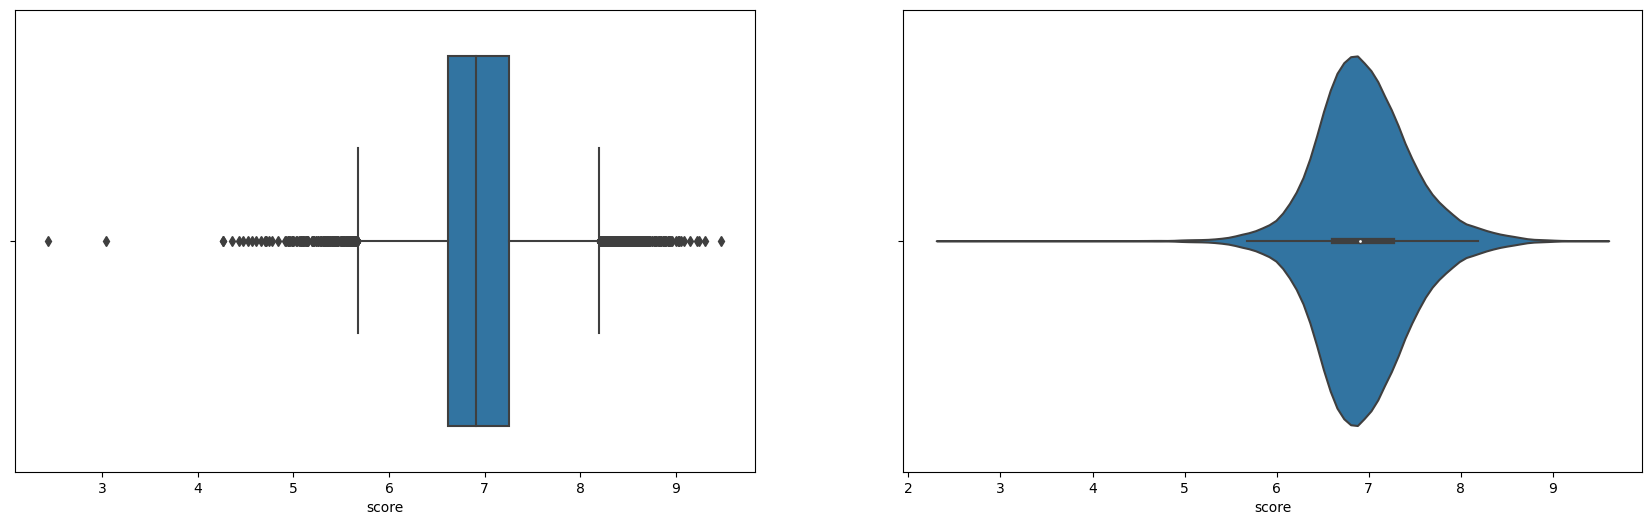

In [30]:
fig, ax = plt.subplots(figsize=(21,6), nrows=1, ncols=2)
sns.boxplot(df, x='score', ax=ax[0])
sns.violinplot(df, x='score', ax=ax[1])

### As had already been speculated, the feature is already pretty normal (i.e, it is following a normal distribution), the above two plots reinforce the speculation by showing the skew if any and we can see that there isn't a lot of skewness apparently visible.

In [31]:
skew = df['score'].skew()
skew

0.18206351648076116

### The skewness value further concretizes our assumption but still 0.18 is still a little bit high although we have seen that the histogram plot and box plot showing it to be like normally distirbuted. So, let us further normalize it. We use the boxcox technique given in the scipy library. The The Box-Cox transform is given by:

### $$ y = \frac{x^{\lambda - 1}}{\lambda}, \lambda \ne 0 $$
### $$ log(x), \lambda = 0 $$

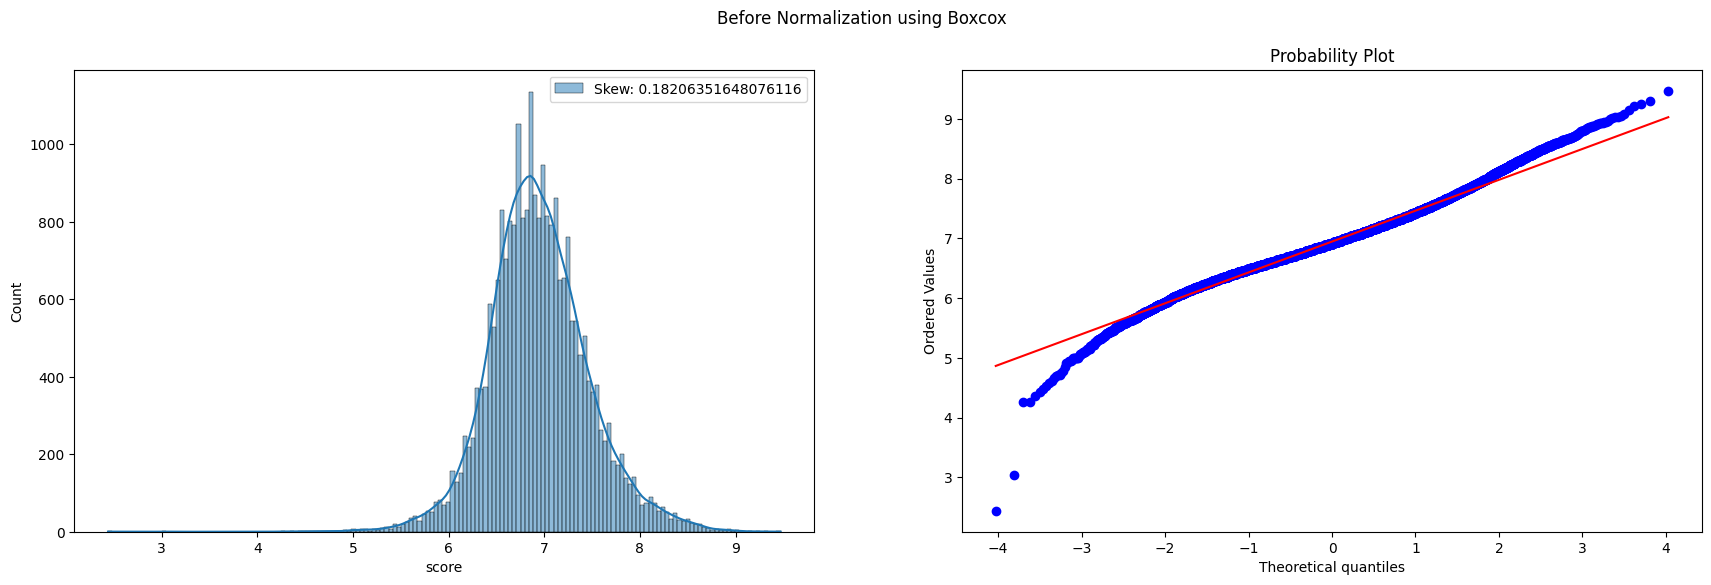

In [32]:
fig, ax = plt.subplots(figsize=(21,6), nrows=1, ncols=2)
fig.suptitle('Before Normalization using Boxcox')
sns.histplot(data=df, x='score', kde=True, ax=ax[0], label=f'Skew: {skew}')
sp.stats.probplot(df['score'], plot=ax[1])
ax[0].legend()

In [33]:
df['score'] = sp.stats.boxcox(df['score'])[0]
df['score']

0        4.986949
1        4.876469
2        4.911941
3        4.787295
4        4.791771
           ...   
24631    3.315986
24632    3.242750
24633    3.253251
24634    3.184755
24635    3.147637
Name: score, Length: 24636, dtype: float64

In [34]:
new_skew = df['score'].skew()

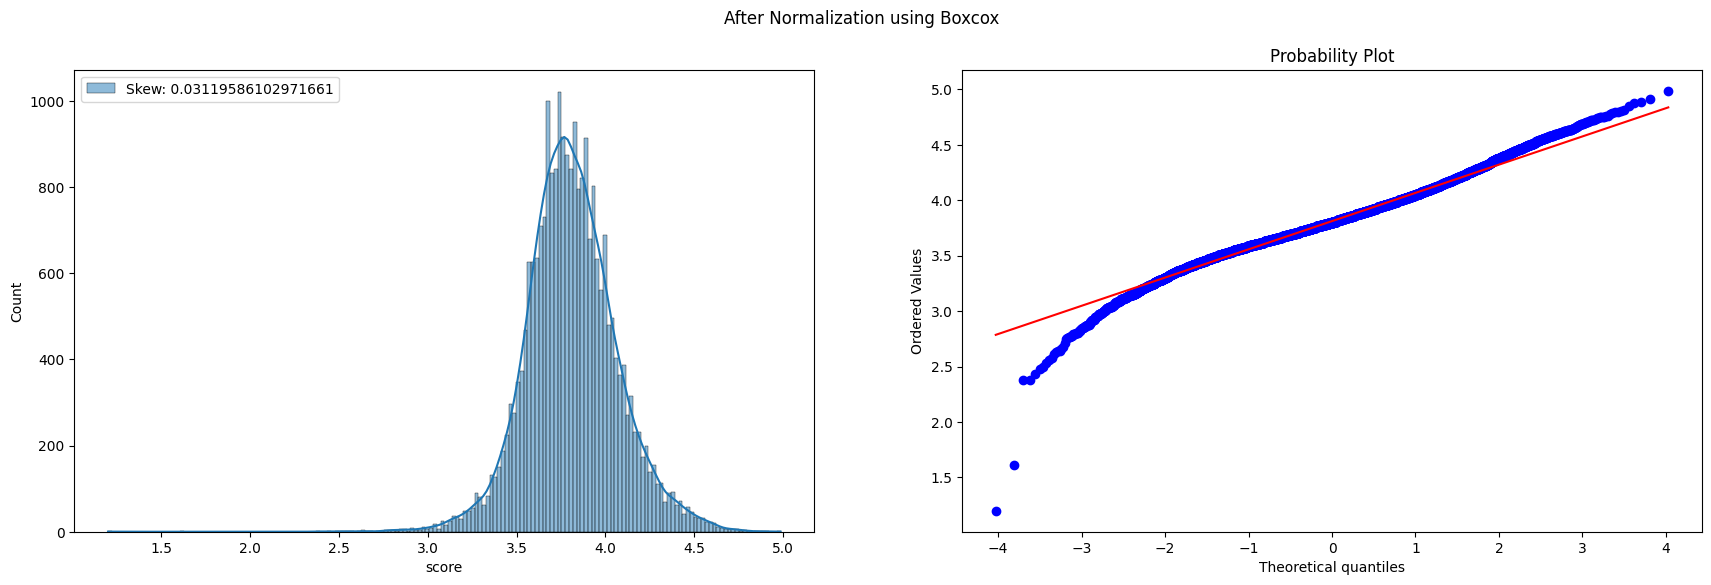

In [35]:
fig, ax = plt.subplots(figsize=(21,6), nrows=1, ncols=2)
fig.suptitle('After Normalization using Boxcox')
sns.histplot(data=df, x='score', kde=True, ax=ax[0], label=f'Skew: {new_skew}')
sp.stats.probplot(df['score'], plot=ax[1])
ax[0].legend()

### The data is normalized even further and we can see that the skew is 0.03. But now that we have normalized the score feature, let us check how does it change the summary statistics.

In [36]:
df.describe()

score      scored_by       volumes      chapters   start_date  \
count  24636.000000   24636.000000  18322.000000  19939.000000      23765.0   
mean       3.811176    1769.555691      3.921242     26.740358  2010.219903   
min        1.199673     100.000000      1.000000      1.000000       1946.0   
25%        3.653122     203.000000      1.000000      5.000000       2006.0   
50%        3.797342     418.000000      2.000000      9.000000       2011.0   
75%        3.963639    1060.000000      4.000000     26.000000       2016.0   
max        4.986949  394362.000000    200.000000   6477.000000       2023.0   
std        0.256212    8839.552408      6.005744     70.176909     8.462833   

          end_date        members      favorites  \
count      19599.0   24636.000000   24636.000000   
mean   2011.090719    4427.903190     143.932619   
min         1947.0     166.000000       0.000000   
25%         2007.0     610.000000       1.000000   
50%         2012.0    1191.000000       4.000000   
75%         2017.0    2896.000000      19.000000   
max         2023.0  643969.000000  119470.000000   
std       8.097007   17656.467096    1711.092022   

                     real_start_date                  real_end_date  
count                          23765                          19599  
mean   2010-08-30 10:55:51.718914304  2011-07-14 16:11:40.933721088  
min              1946-01-04 00:00:00            1947-04-01 00:00:00  
25%              2006-09-07 00:00:00            2007-11-28 12:00:00  
50%              2011-10-05 00:00:00            2012-09-25 00:00:00  
75%              2016-10-09 00:00:00            2017-02-07 12:00:00  
max              2023-07-17 00:00:00            2023-07-28 00:00:00  
std                              NaN                            NaN

### We can see that now the range of scores are not from 0 to 10 anymore, it is 0 to 5 now. Now that we have done these inferences, let us construct a confidence interval for the mean of scores and also let us put forward an hypothesis and test it.

### Construction of confidence interval for mean of scores

#### We see that the population size is large and it follows a normal distribution, we construct a confidence interval using S (since the population standard deviation is unknown). The population mean is given as 3.811176. So we use the formula $ \bar{x} \pm Z_{\frac{\alpha}{2}}\frac{S}{\sqrt{n}} $ to construct the 95% confidence interval for the sample mean for the first 100 samples from the population.

In [37]:
x_bar = df['score'].mean()
S2 = 0
for score in df['score']:
    S2 += (1/df.shape[0]) * (score - x_bar)**2
S = np.sqrt(S2)
print("x_bar: ", x_bar)
print("S: ", S)

x_bar:  3.8111758698644556
S:  0.2562064943153626


In [38]:
alpha = 0.05
bounds = [] 
lb = (x_bar - (sp.stats.norm.ppf(1 - alpha/2) * (S / np.sqrt(df.head(100).shape[0]))))
ub = (x_bar + (sp.stats.norm.ppf(1 - alpha/2) * (S / np.sqrt(df.head(100).shape[0]))))
bounds.append(lb)
bounds.append(ub)

In [39]:
print("The Confidence Interval for Sample Mean is: ", bounds)

The Confidence Interval for Sample Mean is:  [3.760960319718118, 3.861391420010793]


### This is the required 95% confidence interval for the sample mean $\bar{x}$ : 
### [3.760960319718118, 3.861391420010793]

### Now let us move on towards testing a hypothesis. I propose a hypothesis for the mean of the data ('score' feature) $ H_0: \mu = 3.911175 $ vs $ H_1: \mu \ne 3.911175$ with $ \alpha = 0.5 $ and sigma unknown, so we do Z-test with S as our population standard deviation. The number of samples is 100.

### $$ Z_{cal} = \frac{\bar{x} - \mu_{0}}{\frac{S}{\sqrt{n}}} $$

In [40]:
Z_cal = (x_bar - 3.9111758698644556)/(S/np.sqrt(100))
Z_cal

-3.9031016862871115

In [41]:
p_value_z = 2 * (1 - (sp.stats.norm.cdf(np.abs(Z_cal))))
p_value_z

9.496777963780012e-05

### Since the p-value is lesser than 0.5, we reject the null hypothesis.